# Run and Tumble simplificado

In [362]:
import numpy as np
from scipy.stats import truncnorm
import matplotlib.pyplot as plt


In [363]:
np.random.seed(123)

In [364]:
# Gradiente de concentración del medio
global Cx, Cy
Cx, Cy = 1.0, 2.0

def concentration(position):
    return Cx * (position[0]-10)**2 
    return Cx * (position[0]-10)**2 + Cy * (position[1]+15)**2 -5**2 # circunferencia
    return Cx * (position[0]-30)**2 + Cy * (position[1]-20)**2
    return Cx * position[0]**2 + Cy * position[1]**2
    return Cx * position[0] + Cy * position[1] # Distribución uniforme 

In [365]:
# Definción de la distribución de probabildiad de los ángulos de desviaicón de los tumbles
global tumble_gaussian
tumble_gaussian = truncnorm.rvs(-np.pi, np.pi, loc=0, scale=.25, size=1000)

# Definición de la función para producir un run and tumble
def run_and_tumble(num_steps, step_size, tumble_prob, alpha):
    # Inicializamos la posición y la orientación inicial
    positions = np.zeros((num_steps + 1, 2))
    positions[0] = np.array([0.0, 0.0])
    orientation = np.random.rand() * 2 * np.pi  # Orientación inicial

    for i in np.arange(1, num_steps + 1):
        c_old = concentration(positions[i - 1])
        
        # Movimiento "run"
        positions[i] = positions[i - 1] + step_size * np.array([np.cos(orientation), np.sin(orientation)])
        c_new = concentration(positions[i])
       
        if c_new > c_old:
            positions[i] += alpha * np.array([np.cos(orientation), np.sin(orientation)])
        else:
            positions[i] -= alpha * np.array([np.cos(orientation), np.sin(orientation)])
        
        # Tumble con probabilidad tumble_prob
        if np.random.rand() < tumble_prob:
            # La desviación en el tumble se obtiene de una distribución de probabilidad
            deviation = tumble_gaussian[int(np.random.uniform(0,1000))]
            orientation += deviation

    return positions


# Una partícula

Parámetros de la simulación

In [366]:
# Parámetros de la simulación
num_steps = 1000
step_size = 0.10
tumble_prob = 0.10
alfa = 0.075

# Quimiotaxis
Cx, Cy = 0.0 , 0.0

#if alfa > step_size: raise('El valor de alfa debe ser menor que el tamaño de paso')

# Simulación del movimiento run and tumble
n_simulations = 1000
trajectories = []
final_positions = np.zeros([n_simulations, 2])

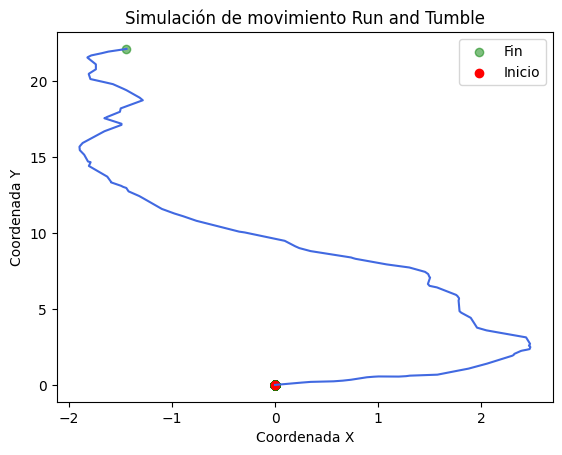

In [367]:
# Simulación de una partícula
final_positions = np.zeros([n_simulations, 2])
    
for i in np.arange(1):
    trajectory = run_and_tumble(num_steps, step_size, tumble_prob, alfa)
    final_positions[i] = trajectory[-1]
    plt.plot(trajectory[:, 0], trajectory[:, 1], color='royalblue', alpha = 1)
    
plt.scatter(final_positions[:,0], final_positions[:,1], color='green', alpha = 0.5, label='Fin')
plt.scatter(trajectory[0, 0], trajectory[0, 1], color='red', label='Inicio')
plt.title('Simulación de movimiento Run and Tumble')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()

# Muchas partículas

Parámetros de la simulación

In [368]:
# Parámetros de la simulación
num_steps = 5000
step_size = 0.10
tumble_prob = 0.50
alfa = -0.05

# Quimiotaxis
Cx, Cy = 1.0, 1.0


#if alfa > step_size: raise('El valor de alfa debe ser menor que el tamaño de paso')

# Simulación del movimiento run and tumble
n_simulations = 2000
trajectories = []
final_positions = np.zeros([n_simulations, 2])

In [369]:
# Simulamos para diversas partículas
final_positions = np.zeros([n_simulations, 2])
for i in np.arange(n_simulations):
    trajectory = run_and_tumble(num_steps, step_size, tumble_prob, alfa)
    #trajectories.append(trajectory)
    final_positions[i] = trajectory[-1]

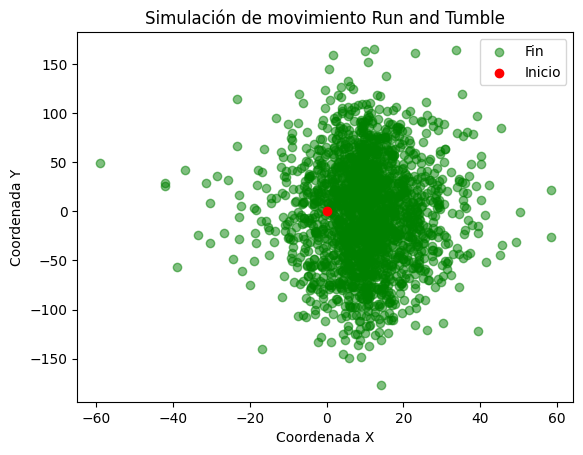

In [370]:
# Visualización de la trayectoria
plt.scatter(final_positions[:,0], final_positions[:,1], color='green', alpha = 0.5, label='Fin')
plt.scatter(trajectory[0, 0], trajectory[0, 1], color='red', label='Inicio')
plt.title('Simulación de movimiento Run and Tumble')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()

Histograma

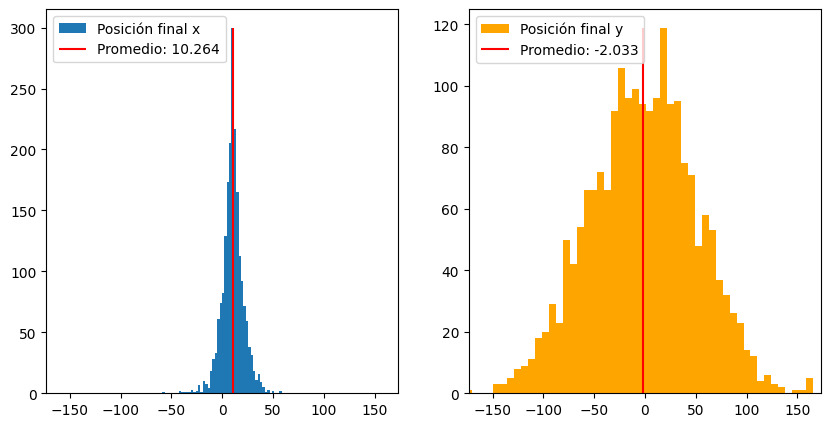

In [371]:
n_bins = 50

x , bins_x = np.histogram(final_positions[:,0], bins =n_bins)
y , bins_y = np.histogram(final_positions[:,1], bins =n_bins)

bins_x = bins_x[:-1] + np.diff(bins_x) / 2
bins_y = bins_y[:-1] + np.diff(bins_y) / 2

X_avg = np.ma.average(bins_x, weights=x)
Y_avg = np.ma.average(bins_y, weights=y)

x_avg, y_avg = round(X_avg, 3), round(Y_avg, 3)

xlim = np.max(np.abs([bins_x, bins_y]))

fig, ax = plt.subplots(1,2, figsize=(10, 6))
fig.subplots_adjust(top= .75)
# fig.suptitle(f"""
#              Concentración: {Cx}x + {Cy}y
#              Número de simulaciones: {n_simulations}
#              Número de pasos: {num_steps}
#              Tamaño de paso: {step_size}
#              """)
ax[0].hist(final_positions[:,0], label='Posición final x', bins = n_bins)
ax[0].vlines([x_avg], 0, max(x), label = f"Promedio: {x_avg}", color='red')
ax[0].set_xlim(xmin=-xlim, xmax=xlim)
ax[0].legend()
ax[1].hist(final_positions[:,1], label='Posición final y', bins = n_bins , color='orange')
ax[1].vlines([y_avg], 0, max(y), label = f"Promedio: {y_avg}", color='red')
ax[1].set_xlim(xmin=-xlim, xmax=xlim)
ax[1].legend()